In [1]:
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [2]:
db = datasets.fetch_lfw_people(min_faces_per_person=100, resize=0.4)

In [3]:
db

{'data': array([[ 85.666664,  81.666664,  53.      , ..., 110.666664, 117.333336,
         181.66667 ],
        [ 48.666668,  56.333332,  87.333336, ..., 234.33333 , 231.66667 ,
         223.      ],
        [ 37.333332,  39.666668,  49.666668, ..., 103.333336,  81.333336,
          59.666668],
        ...,
        [226.      , 220.      , 202.33333 , ..., 148.66667 , 147.66667 ,
         160.66667 ],
        [102.333336, 126.      , 141.66667 , ..., 212.33333 , 217.66667 ,
         162.      ],
        [ 48.333332,  91.333336, 128.33333 , ...,  17.666666,  30.333334,
          28.666666]], dtype=float32),
 'images': array([[[ 85.666664,  81.666664,  53.      , ..., 102.666664,
          102.333336,  93.666664],
         [ 93.      ,  78.      ,  62.666668, ...,  84.      ,
          104.      ,  96.      ],
         [ 94.      ,  71.666664,  97.666664, ...,  71.333336,
           82.333336,  89.666664],
         ...,
         [ 29.666666,  34.      ,  43.333332, ..., 108.333336,
     

In [4]:
db.keys()

dict_keys(['data', 'images', 'target', 'target_names', 'DESCR'])

In [5]:
db.data.shape #this is reshaped 1D form of the image

(1140, 1850)

In [6]:
db.images.shape #hence the image is 50*37 image

(1140, 50, 37)

In [7]:
db.target_names

array(['Colin Powell', 'Donald Rumsfeld', 'George W Bush',
       'Gerhard Schroeder', 'Tony Blair'], dtype='<U17')

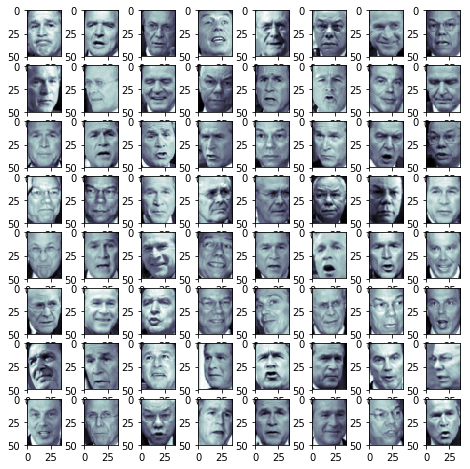

In [8]:
fig = plt.figure(figsize=(8,8))
for i in range(64):
    ax = fig.add_subplot(8,8,i+1)
    ax.imshow(db.images[i], cmap = plt.cm.bone)
plt.show()

In [9]:
x,y = db.data, db.target
algo = PCA()
algo.fit(x)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [10]:
k = 0
total = sum(algo.explained_variance_)
current = 0
while(current/total < 0.99):
    current += algo.explained_variance_[k]
    k+=1
print(k)

347


In [11]:
k = 0
total = sum(algo.explained_variance_)
current = 0
while(current/total < 0.95):
    current += algo.explained_variance_[k]
    k+=1
print(k)
#So out of 1850 we need only 137 features

137


In [12]:
algo2 = PCA(n_components=347, whiten=True)
trans_data = algo2.fit_transform(x)
trans_data.shape

(1140, 347)

In [13]:
x_approx_data = algo2.inverse_transform(trans_data)
x_approx_images = x_approx_data.reshape((1140,50,37))

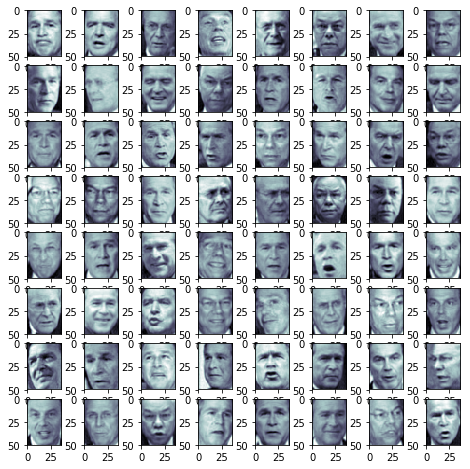

In [14]:
fig = plt.figure(figsize=(8,8))
for i in range(64):
    ax = fig.add_subplot(8,8,i+1)
    ax.imshow(x_approx_images[i], cmap = plt.cm.bone)
plt.show()

In [15]:
algo2.components_.shape

(347, 1850)

In [16]:
#Now we will plot the eigen faces
eigenv = algo2.components_
eigenfaces = eigenv.reshape((347,50,37))

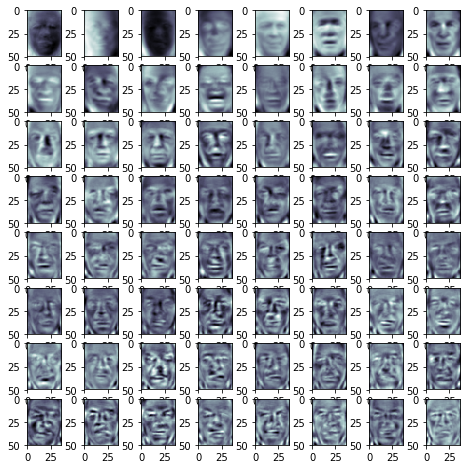

In [17]:
fig = plt.figure(figsize = (8,8))
for i in range(64):
    axm = fig.add_subplot(8,8,i+1)
    axm.imshow(eigenfaces[i], cmap = plt.cm.bone)
plt.show()

In [31]:
#Now lets do classification work
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import ensemble
import time
x,y = db.data, db.target
x_train, x_test, y_train, y_test = train_test_split(x,y, random_state = 0)

In [19]:
algo3 = PCA()
algo3.fit(x_train)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [21]:
k = 0
total = sum(algo3.explained_variance_)
current = 0
while(current/total < 0.99):
    current += algo3.explained_variance_[k]
    k+=1
print(k)

316


In [38]:
algo4 = PCA(n_components=316, whiten =True)
x_train_trans = algo4.fit_transform(x_train)
x_train_trans.shape

(855, 316)

In [39]:
x_approx = algo4.inverse_transform(x_train_trans)
x_approx_image = x_approx.reshape((855,50,37))

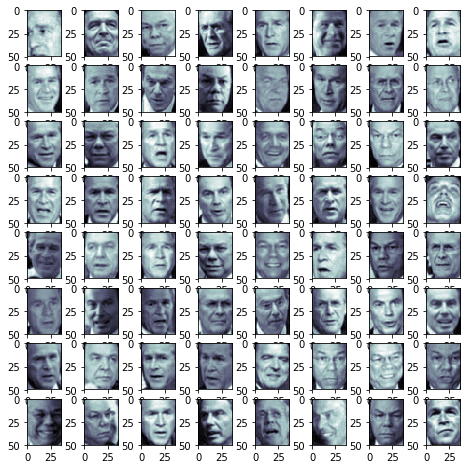

In [40]:
fig = plt.figure(figsize = (8,8))
for i in range(64):
    axm = fig.add_subplot(8,8,i+1)
    axm.imshow(x_approx_image[i], cmap = plt.cm.bone)
plt.show()

In [41]:
print(algo4.components_.shape)
eigenv = algo4.components_
eigenfaces = eigenv.reshape((316,50,37))

(316, 1850)


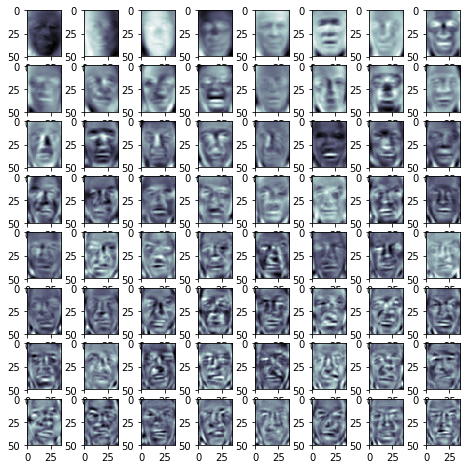

In [42]:
fig = plt.figure(figsize = (8,8))
for i in range(64):
    axm = fig.add_subplot(8,8,i+1)
    axm.imshow(eigenfaces[i], cmap = plt.cm.bone)
plt.show()

In [43]:
x_test_trans = algo4.transform(x_test)

In [44]:
rf = ensemble.RandomForestClassifier()
start = time.time()
rf.fit(x_train,y_train)
print(time.time()-start)
y_pred = rf.predict(x_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

/home/abh1kudo/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.3023061752319336
              precision    recall  f1-score   support

           0       0.69      0.70      0.70        61
           1       0.57      0.22      0.32        36
           2       0.60      0.92      0.72       122
           3       0.33      0.06      0.11        31
           4       0.50      0.23      0.31        35

   micro avg       0.61      0.61      0.61       285
   macro avg       0.54      0.43      0.43       285
weighted avg       0.57      0.61      0.55       285

[[ 43   2  15   0   1]
 [  8   8  18   0   2]
 [  6   2 112   0   2]
 [  1   1  24   2   3]
 [  4   1  18   4   8]]


In [45]:
rf2 = ensemble.RandomForestClassifier()
start = time.time()
rf2.fit(x_train_trans,y_train)
print(time.time()-start)
y_pred = rf2.predict(x_test_trans)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

0.17191338539123535
              precision    recall  f1-score   support

           0       0.54      0.56      0.55        61
           1       0.41      0.19      0.26        36
           2       0.54      0.83      0.65       122
           3       0.45      0.16      0.24        31
           4       0.50      0.09      0.15        35

   micro avg       0.53      0.53      0.53       285
   macro avg       0.49      0.37      0.37       285
weighted avg       0.51      0.53      0.47       285

[[ 34   2  25   0   0]
 [  9   7  18   2   0]
 [ 11   5 101   3   2]
 [  5   1  19   5   1]
 [  4   2  25   1   3]]


/home/abh1kudo/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [46]:
"""Time is reduced the accuracy is also reduced"""

'Time is reduced the accuracy is also reduced'